<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.

**Fecha:** 15 de octubre del 2020.

**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6. Distribuciones de Probabilidad

### El link donde se evidencia el trabajo es el siguiente: [GitHub Repositorio](https://github.com/nicoglez/Tareas_SNGonzalez_DGomez)

## Enunciado de tarea 

>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


In [1]:
# Importacion de librerias
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

# Solucion de los Ejercicios

>**Ejercicio 1**.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

### Solucion Nicolas

In [2]:
# Definir condiciones iniciales
mu_p = 44; sigma_p = 9; d = 47; a = 40 ; b = 49

# Utilizar solucionador de ecuaciones no lineales para encontrar los valores de la ecuacion
def Betad(p: ' Parametros de Alpha y Beta en una tupla'):
    '''Funcion para encontrrar la alpha y la beta de una distribucion beta con fsolve'''
    Alpha, Beta = p
    return (((a*Beta+b*Alpha)/(Alpha + Beta)) - mu_p, (Alpha*Beta*(b-a)**2)/ ((Alpha+Beta)**2*(1+Alpha+Beta)) - sigma_p)

Alpha, Beta =  fsolve(Betad, (0.1,4))

Alpha, Beta

(0.543209876543222, 0.67901234567902)

In [3]:
# Comprobar que los parametros obtenidos son correctos (tiene que dar lo mismo que la mu y sigma que tenemos)
print('La media con la Alpha y Beta encontradas es ', (a*Beta+b*Alpha)/(Alpha + Beta))
print('La varianza con la Alpha y Beta encontradas es ', (Alpha*Beta*(b-a)**2)/ ((Alpha+Beta)**2*(1+Alpha+Beta)))

La media con la Alpha y Beta encontradas es  44.00000000000003
La varianza con la Alpha y Beta encontradas es  8.999999999999932


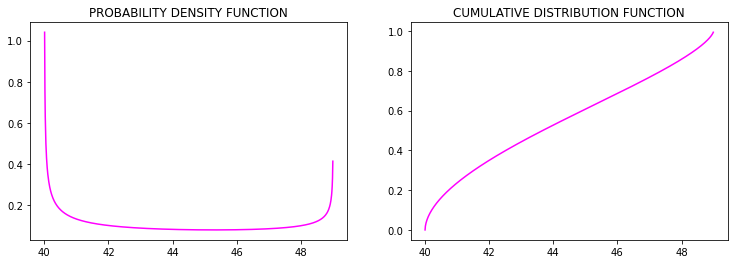

In [15]:
# Obtener la probability density function de la distribucion dados los parametros
x = np.arange(a,b,0.01)
beta_pdf = st.beta.pdf(x, a = Alpha, b = Beta, loc = a, scale = b-a)
# obtener la distribucion de probabilidad acumulada
beta_cdf = st.beta.cdf(x, a = Alpha, b = Beta, loc = a, scale = b-a)

# subplots
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(12.5)

# grafica PDF
ax1.plot(x,beta_pdf,c='magenta')
ax1.set_title('PROBABILITY DENSITY FUNCTION')
plt.grid()

# grafica CDF
ax2.plot(x,beta_cdf,c='magenta')
ax2.set_title('CUMULATIVE DISTRIBUTION FUNCTION')
plt.grid()

plt.show()

In [5]:
# Obtener la probabilidad de acabar la construccion en 47 semanas, distribucion beta
P_beta = st.beta(a = Alpha, b = Beta, loc = a, scale = b-a).cdf(d)
print('P(T<=47)=',P_beta)

P(T<=47)= 0.7677251926229143


### **La probabilidad de acabar la construccion en 47 semanas, segun la distribucion beta es de 76.77%**

### Solucion Doris

In [6]:
#1
op_A = 40

pe_B = 49

miu = 44

sigma = 9

d = 47
def fun(x):
    al, be = x
    
    f = np.zeros(2)
    
    f[0] = ((op_A * be + pe_B * al) / (al + be)) - miu
    
    f[1] = ((al * be * (pe_B - op_A)**2) / ((al + be)**2 * (1 + al + be)) -sigma)
    
    return f


In [7]:
alpha, beta = fsolve(fun, (1,1))
alpha,beta

(0.5432098765398357, 0.6790123456890043)

In [8]:
prob_beta = st.beta(a = alpha,b = beta, loc = op_A, scale = pe_B - op_A).cdf(d)
prob_beta

0.7677251926284654

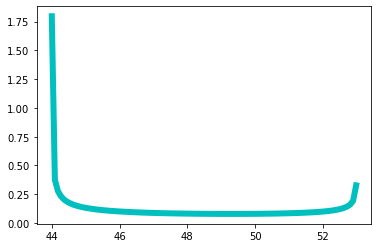

In [9]:
fig, ax = plt.subplots(1, 1)
def dist_beta(alpha, beta, miu, sigma):
    x = np.linspace(st.beta.ppf(0.01, alpha, beta, loc = miu, scale = sigma),
                    st.beta.ppf(0.99, alpha, beta, loc = miu, scale = sigma), 100)
    ax.plot(x, st.beta.pdf(x, alpha, beta, loc = miu, scale = sigma),'c-', lw = 6,  label='Dist. beta')
dist_beta(alpha, beta, miu, sigma)

 > **Ejercicio 2.**.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


### Solucion Nicolas

In [10]:
# Poner datos iniciales
pesimista, mu, optimista, = 40, 44, 49

# Obtener los parametros de la distribucion triangular 
c = (mu - pesimista) / (optimista - pesimista)
loc = pesimista
scale = optimista - pesimista

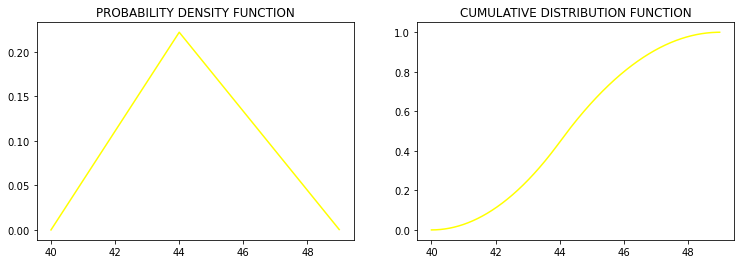

In [16]:
# obtener la probability density function
x = np.arange(pesimista, optimista,0.01)
triang_pdf = st.triang.pdf(x = x, c = c, scale = scale, loc = loc)

# obtener la distribucion de probabilidad acumulada
triang_cdf = st.triang.cdf(x = x, c = c, scale = scale, loc = loc)

# subplots
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(12.5)

# grafica PDF
ax1.plot(x,triang_pdf,c='yellow')
ax1.set_title('PROBABILITY DENSITY FUNCTION')
plt.grid()

# grafica CDF
ax2.plot(x,triang_cdf,c='yellow')
ax2.set_title('CUMULATIVE DISTRIBUTION FUNCTION')
plt.grid()

plt.show()

In [12]:
# Obtener la probabilidad de acabar la construccion en 47 semanas segun dist. triangular
P_triang = st.triang(c = c, scale = scale, loc = loc).cdf(d)
print('P(T<=47)=',P_triang)

P(T<=47)= 0.9111111111111111


### **La probabilidad de acabar la construccion en 47 semanas, segun la distribucion triangular es de 91.11%**

### Solucion Doris

In [13]:
#2

c = (miu - op_A)/(pe_B - op_A)

Prob_T = st.triang(c, loc = op_A, scale = (pe_B - op_A)).cdf(d)
Prob_T


0.9111111111111111

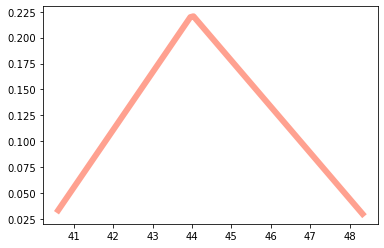

In [14]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(st.triang.ppf(0.01, c, loc = op_A, scale = (pe_B - op_A)), st.triang.ppf(0.99, c, loc = op_A, scale = (pe_B - op_A)), 100)
ax.plot(x, st.triang.pdf(x, c, loc = op_A, scale = (pe_B - op_A)), 'tomato',lw = 6, alpha=0.6, label='Dist tri')

### Respuesta planteada en el ejercicio usando (markdown)

> **EJERCICIO 1.** La probabilidad de acabar la construccion en 47 semanas, segun la distribucion beta es de 76.77%

> **EJERCICIO 2.** La probabilidad de acabar la construccion en 47 semanas, segun la distribucion triangular es de 91.11%